In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import tensorflow as tf

import geopandas as gpd
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
input_file = "data/combined_data4.geojson"
## Read combined data
combined_gdf = gpd.read_file(input_file)

In [3]:
print(combined_gdf.head())
print(combined_gdf.crs)
print(combined_gdf.columns.to_list())
combined_gdf.crs = "EPSG:25832"
print(combined_gdf.crs)

                     id                                                B11  \
0  00000000000000001a6a  [ [ 0.28049999475479126, 0.28049999475479126, ...   
1  00000000000000001a6b  [ [ 0.2807999849319458, 0.2807999849319458, 0....   
2  00000000000000001a6c  [ [ 0.29300001263618469, 0.29969999194145203, ...   
3  00000000000000001a6d  [ [ 0.29730001091957092, 0.30210000276565552, ...   
4  00000000000000001a6e  [ [ 0.3059999942779541, 0.3059999942779541, 0....   

                                               B11_1  \
0  [ [ 0.30849999189376831, 0.30849999189376831, ...   
1  [ [ 0.21970000863075256, 0.21970000863075256, ...   
2  [ [ 0.31360000371932983, 0.31650000810623169, ...   
3  [ [ 0.32719999551773071, 0.31650000810623169, ...   
4  [ [ 0.33559998869895935, 0.33559998869895935, ...   

                                               B11_2  \
0  [ [ 0.26954999566078186, 0.26954999566078186, ...   
1  [ [ 0.26690000295639038, 0.26690000295639038, ...   
2  [ [ 0.26550000905990601

In [4]:

# for now, we just select the NDVI, and keep id&species
select_col = ['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7', 'l1_leaf_types', 'l2_genus', 'l3_species']
select_col_ = ['l1_leaf_types', 'l2_genus','l3_species', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7']

select_df = combined_gdf[select_col]

nullds = select_df.isnull().sum()
print(nullds)

id                  0
B11                 0
B11_1               0
B11_2               0
B11_3               0
                 ... 
SAVI_6              9
SAVI_7           1942
l1_leaf_types       0
l2_genus            0
l3_species          0
Length: 124, dtype: int64


In [5]:
# drop rows containing null values
select_df = select_df.dropna()

# drop rows containing 'none' (in any case) in any column
select_df = select_df[~select_df.apply(lambda row: row.astype(str).str.lower().eq('none').any(), axis=1)]

nullds = select_df.isnull().sum()
print(nullds)

id               0
B11              0
B11_1            0
B11_2            0
B11_3            0
                ..
SAVI_6           0
SAVI_7           0
l1_leaf_types    0
l2_genus         0
l3_species       0
Length: 124, dtype: int64


In [6]:
# load the labels
labels = np.array(select_df[['l1_leaf_types', 'l2_genus','l3_species']])
sen2 = np.array(select_df[['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B8', 'B8A', 'B8A_1', 'B8A_2','B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6']])
# show the shape
print("Labels shape: " + str(labels.shape))
#print("Sen2 shape: " + str(sen2.shape))

# print the labels
print(labels[:])
print(sen2[:])
print(sen2.shape)

Labels shape: (35965, 3)
[['broadleaf' 'long-lived deciduous' 'linden']
 ['broadleaf' 'long-lived deciduous' 'linden']
 ['broadleaf' 'long-lived deciduous' 'linden']
 ...
 ['broadleaf' 'short-lived deciduous' 'alder']
 ['broadleaf' 'short-lived deciduous' 'alder']
 ['broadleaf' 'short-lived deciduous' 'alder']]
[['[ [ 0.28049999475479126, 0.28049999475479126, 0.29100000858306885, 0.29100000858306885, 0.29100000858306885 ], [ 0.29429998993873596, 0.29429998993873596, 0.29330000281333923, 0.29330000281333923, 0.29330000281333923 ], [ 0.29429998993873596, 0.29429998993873596, 0.29330000281333923, 0.29330000281333923, 0.29330000281333923 ], [ 0.28009998798370361, 0.28009998798370361, 0.27129998803138733, 0.27129998803138733, 0.27129998803138733 ], [ 0.28009998798370361, 0.28009998798370361, 0.27129998803138733, 0.27129998803138733, 0.27129998803138733 ] ]'
  '[ [ 0.30849999189376831, 0.30849999189376831, 0.31549999117851257, 0.31549999117851257, 0.31549999117851257 ], [ 0.31130000948905945

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# load the labels
labels_l1 = np.array(select_df[['l1_leaf_types']])
labels_l2 = np.array(select_df[['l2_genus']])
labels_l3 = np.array(select_df[['l3_species']])


encoder = OneHotEncoder(sparse_output=False)
labels_l1 = encoder.fit_transform(labels_l1.reshape(-1, 1))
labels_l2 = encoder.fit_transform(labels_l2.reshape(-1, 1))
labels_l3 = encoder.fit_transform(labels_l3.reshape(-1, 1))
#print("Labels shape: " + str(labels.shape))
#print("\nFirst 19 rows:")

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

print("Initial shapes:")
print(f"labels_l1: {labels_l1.shape}")
print(f"labels_l2: {labels_l2.shape}")
print(f"labels_l3: {labels_l3.shape}")
print(f"sen2: {sen2.shape}")

print(labels_l1.dtype)
print(labels_l2.dtype)
print(labels_l3.dtype)
print(sen2.dtype)

Initial shapes:
labels_l1: (35965, 2)
labels_l2: (35965, 9)
labels_l3: (35965, 19)
sen2: (35965, 105)
float64
float64
float64
object


In [10]:
import ast
# Convert string representation of arrays to actual numpy arrays
def convert_string_to_array(s):
	# Using ast.literal_eval to safely evaluate the string as a Python literal
	array_data = ast.literal_eval(s)
	return np.array(array_data)

# Convert all elements in sen2 to numpy arrays
sen2_arrays = np.array([convert_string_to_array(x) for x in sen2.flatten()])
number_samples = sen2.shape[0]
sen2_reshaped = sen2_arrays.reshape(number_samples, -1)

print("Post-processed Sentinel-2 data shape: ", sen2_reshaped.shape)

Post-processed Sentinel-2 data shape:  (35965, 2625)


In [11]:
from imblearn.over_sampling import SMOTE

# Create a dictionary for multiple classes
sampling_strategy = {
    0: 6000,
    1: 4000,
    2: 4000,  
    3: 4000,
    4: 5000,  
    5: 5000,   
    6: 5000,
    7: 5000,
    8: 5000,
    9: 5000,
    10: 5000,
    11: 6200,
    12: 5000,
    13: 5000,
    14: 6200,
    15: 3500,
    16: 3500,
    17: 3500,
    18: 5000
}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, l3_resampled = smote.fit_resample(sen2_reshaped, np.argmax(labels_l3, axis=1))


# Update the labels_l3 with the resampled data
labels_l3_resampled = encoder.fit_transform(l3_resampled.reshape(-1, 1))

Resampled shapes: (90900, 2625) (90900, 19)


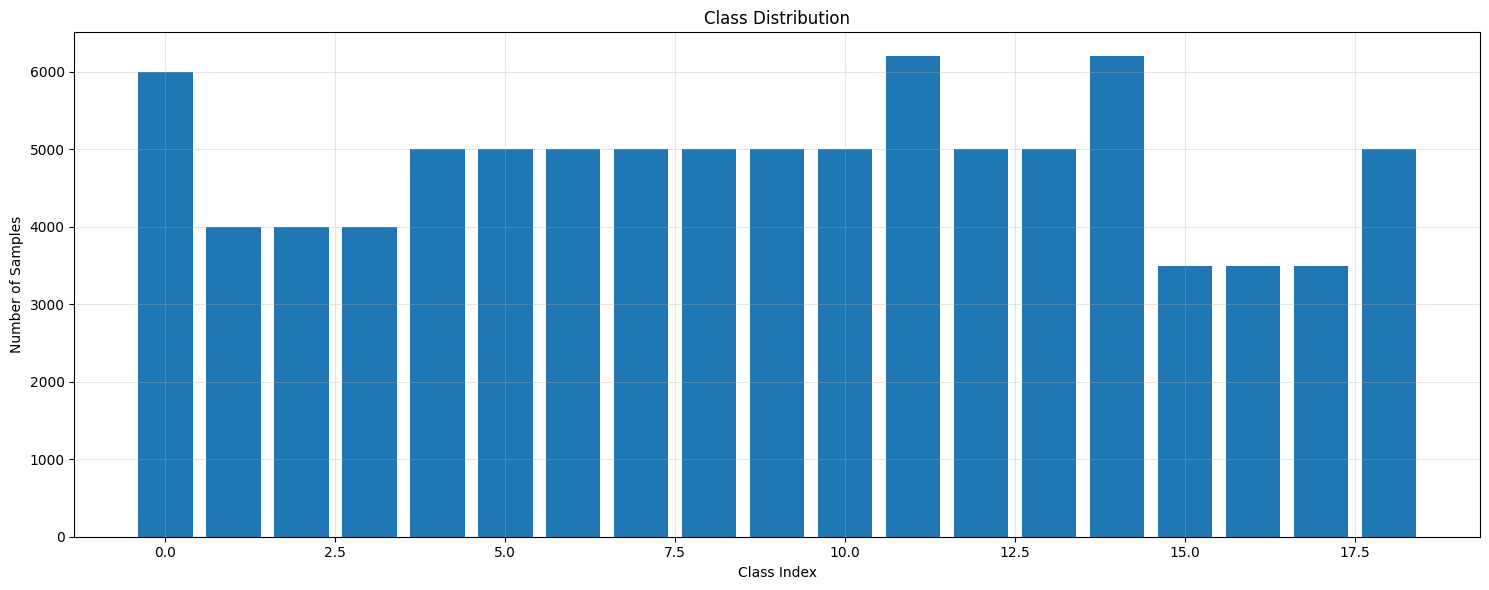

In [12]:
print("Resampled shapes:", X_resampled.shape, labels_l3_resampled.shape)

# Get the sum of each column (class counts)
class_sizes = np.sum(labels_l3_resampled, axis=0)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(range(len(class_sizes)), class_sizes)

# Add labels and title
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')

# Adjust layout
plt.tight_layout()

# Add grid for better readability
plt.grid(True, alpha=0.3)

Resampled shapes: (90900, 19)
Resampled shapes: (90900, 2) (90900, 9)


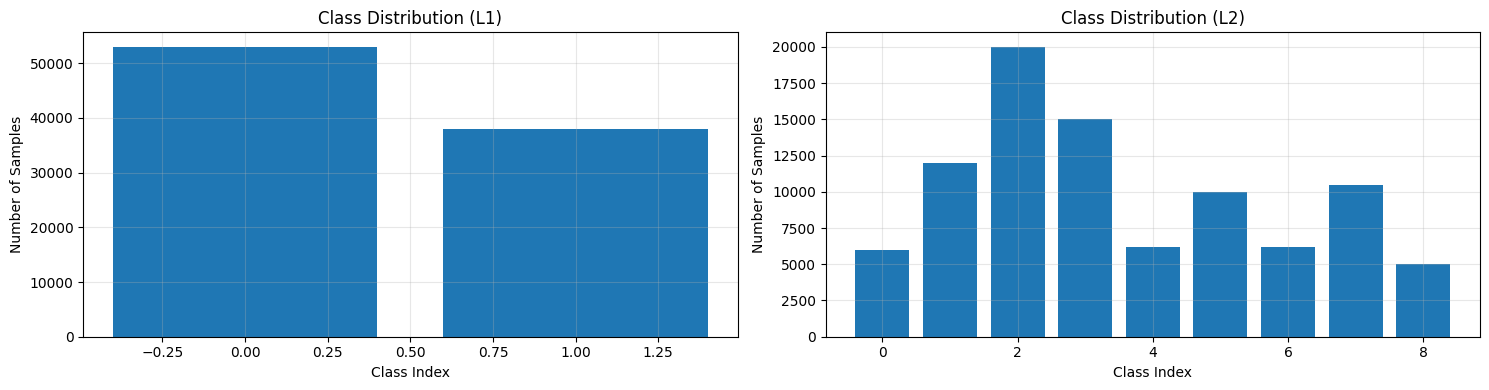

In [13]:
# 0 -> 0, 1 ,2, 3
  # 0 -> 0
  # 1 -> 1, 2, 3
  # 2 -> 4, 5, 6, 7
  # 3 -> 8, 9, 10
# 1 -> 4, 5, 6, 7, 8
  # 4 -> 11
  # 5 -> 12, 13
  # 6 -> 14
  # 7 -> 15, 16 ,17
  # 8 -> 18


l3_to_l2_l1 = {
    0: (0, 0),  # "european beech" -> beech -> broadleaf
    1: (1, 0),  # "sessile oak"    -> oak   -> broadleaf
    2: (1, 0),  # "english oak"    -> oak   -> broadleaf
    3: (1, 0),  # "red oak"        -> oak   -> broadleaf
    4: (2, 0),  # "sycamore maple" -> long-lived dec. -> broadleaf
    5: (2, 0),  # “european ash”   -> long-lived dec. -> broadleaf
    6: (2, 0),
    7: (2, 0),
    8: (3, 0),
    9: (3, 0),
    10: (3, 0),
    # ...
    11: (4, 1), # "silver birch"   -> birch -> broadleaf
    12: (5, 1),
    13: (5, 1),
    14: (6, 1), # "norway spruce"  -> spruce -> needleleaf
    15: (7, 1), # "scots pine"     -> pine   -> needleleaf
    16: (7, 1), # "black pine"     -> pine   -> needleleaf
    17: (7, 1), # "weymouth pine"  -> pine   -> needleleaf
    18: (8, 1)  # "douglas fir"    -> douglas fir -> needleleaf
}

# Initialize resampled labels with the same number of rows as labels_l3_resampled
num_samples = labels_l3_resampled.shape[0]
num_l1_classes = labels_l1.shape[1]
num_l2_classes = labels_l2.shape[1]

labels_l1_resampled = np.zeros((num_samples, num_l1_classes))
labels_l2_resampled = np.zeros((num_samples, num_l2_classes))


for i in range(len(labels_l3_resampled)):
    l3_onehot = labels_l3_resampled[i]
    l3_idx = np.argmax(l3_onehot)  # which species is 1
    (correct_l2_idx, correct_l1_idx) = l3_to_l2_l1[l3_idx]

    # Zero out and set the corrected one-hot for L2
    labels_l2_resampled[i, :] = 0
    labels_l2_resampled[i, correct_l2_idx] = 1
    
    # Zero out and set the corrected one-hot for L1
    labels_l1_resampled[i, :] = 0
    labels_l1_resampled[i, correct_l1_idx] = 1

print("Resampled shapes:", labels_l3_resampled.shape)
print("Resampled shapes:", labels_l1_resampled.shape, labels_l2_resampled.shape)
# Get the sum of each column (class counts)
plt.figure(figsize=(15, 4))

# Plot for labels_l1_resampled
plt.subplot(1, 2, 1)
class_sizes_l1 = np.sum(labels_l1_resampled, axis=0)
plt.bar(range(len(class_sizes_l1)), class_sizes_l1)
plt.title('Class Distribution (L1)')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

# Plot for labels_l2_resampled
plt.subplot(1, 2, 2)
class_sizes_l2 = np.sum(labels_l2_resampled, axis=0)
plt.bar(range(len(class_sizes_l2)), class_sizes_l2)
plt.title('Class Distribution (L2)')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

plt.tight_layout()

In [14]:
print("X_resampled:", X_resampled.shape) # X_resampled: (97400, 2625)
X_resampled_reshaped = X_resampled.reshape(-1, 5, 5, X_resampled.shape[1] // 25)
print("X_resampled_reshaped:", X_resampled_reshaped.shape)

X_resampled: (90900, 2625)
X_resampled_reshaped: (90900, 5, 5, 105)


In [15]:
# The random forest expects a vector of features. Therefore,
# we concatenate all bands and pixels
number_samples = X_resampled_reshaped.shape[0]
print("Post-processed Sentinel-2 data shape: ", X_resampled_reshaped.shape)

# Let us split the data into train and test
TRAIN_SPLIT = int(number_samples * .8)

X_train = X_resampled_reshaped[:TRAIN_SPLIT,:,:,:]
X_test = X_resampled_reshaped[TRAIN_SPLIT:,:,:,:]


Post-processed Sentinel-2 data shape:  (90900, 5, 5, 105)


In [16]:
X_train.shape, X_test.shape, X_resampled_reshaped.shape

((72720, 5, 5, 105), (18180, 5, 5, 105), (90900, 5, 5, 105))

In [17]:
print(np.any(X_train == None))


False


In [19]:
labels_l1_resampled.shape, labels_l2_resampled.shape, labels_l3_resampled.shape
# The labels are one hot encoded, but the random forest requires
# the class number
y_labels_l1_resampled_train = labels_l1_resampled[0:TRAIN_SPLIT,:]
y_labels_l1_resampled_test = labels_l1_resampled[TRAIN_SPLIT:,:]
y_labels_l2_resampled_train = labels_l2_resampled[0:TRAIN_SPLIT,:]
y_labels_l2_resampled_test = labels_l2_resampled[TRAIN_SPLIT:,:]
y_labels_l3_resampled_train = labels_l3_resampled[0:TRAIN_SPLIT,:]
y_labels_l3_resampled_test = labels_l3_resampled[TRAIN_SPLIT:,:]
print("Post-processed train labels shape: ", y_labels_l1_resampled_train.shape)
print("Post-processed test labels shape: ", y_labels_l1_resampled_test.shape)
print("Post-processed train labels shape: ", y_labels_l2_resampled_train.shape)
print("Post-processed test labels shape: ", y_labels_l2_resampled_test.shape)
print("Post-processed train labels shape: ", y_labels_l3_resampled_train.shape)
print("Post-processed test labels shape: ", y_labels_l3_resampled_test.shape)


Post-processed train labels shape:  (72720, 2)
Post-processed test labels shape:  (18180, 2)
Post-processed train labels shape:  (72720, 9)
Post-processed test labels shape:  (18180, 9)
Post-processed train labels shape:  (72720, 19)
Post-processed test labels shape:  (18180, 19)


After this part apply models

ResNet50 Model

In [20]:
def identity_block(
    input_tensor,
    kernel_size,
    filters,
    stage,
    block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # First component of main path
    x = tf.keras.layers.Conv2D(
        filters=F1,
        kernel_size=(1, 1),
        strides=(1,1),
        padding='valid',
        name=conv_name_base + '2a',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)

    x = tf.keras.layers.BatchNormalization(
        axis=3,
        name=bn_name_base + '2a')(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Second component of main path
    x = tf.keras.layers.Conv2D(
        filters=F2,
        kernel_size=kernel_size,
        strides=(1,1),
        padding='same',
        name=conv_name_base + '2b',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(x)
    x = tf.keras.layers.BatchNormalization(
        axis=3,
        name=bn_name_base + '2b')(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Third component of main path
    x = tf.keras.layers.Conv2D(
        filters=F3,
        kernel_size=(1, 1),
        strides=(1,1),
        padding='valid',
        name=conv_name_base + '2c',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(x)
    x = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(x)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    x = tf.keras.layers.Add()([x, input_tensor])
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [21]:
def convolutional_block(
    input_tensor,
    kernel_size,
    filters,
    stage,
    block,
    strides=(2, 2)):

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # First component of main path
    x = tf.keras.layers.Conv2D(
        F1,
        (1, 1),
        strides = strides,
        name = conv_name_base + '2a',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)

    x = tf.keras.layers.BatchNormalization(
        axis = 3,
        name = bn_name_base + '2a')(x)

    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(
        filters = F2,
        kernel_size = kernel_size,
        strides = (1,1),
        padding = 'same',
        name = conv_name_base + '2b',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(x)

    x = tf.keras.layers.BatchNormalization(
        axis = 3,
        name = bn_name_base + '2b')(x)

    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(
        filters = F3,
        kernel_size = (1, 1),
        strides = (1,1),
        padding = 'valid',
        name = conv_name_base + '2c',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(x)

    x = tf.keras.layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(x)

    tensor_shortcut = tf.keras.layers.Conv2D(
        filters = F3,
        kernel_size = (1, 1),
        strides = strides,
        padding = 'valid',
        name = conv_name_base + '1',
        kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0))(input_tensor)
    tensor_shortcut = tf.keras.layers.BatchNormalization(
        axis = 3,
        name = bn_name_base + '1')(tensor_shortcut)

    x = tf.keras.layers.Add()([x, tensor_shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [22]:
def ResNet50(input_shape=(5, 5, 105), classes=9):
    # Define the input of the model
    M_input = tf.keras.layers.Input(input_shape)
    print("Input shape", M_input.shape)

    # Add zero padding to the patch
    M = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(M_input)

    # Stage 1
    M = tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(7, 7),
        strides=(2, 2),
        name='conv1',
        kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))(M)
    M = tf.keras.layers.BatchNormalization(
        axis=3,
        name='bn_conv1')(M)
    M = tf.keras.layers.Activation('relu')(M)
    M = tf.keras.layers.MaxPool2D(
        pool_size=(3, 3),
        strides=(2, 2))(M)
    print("Stage 1 shape", M.shape)

    # Stage 2
    M = convolutional_block(
        M,
        kernel_size=3,
        filters=[64, 64, 256],
        stage=2,
        block='a',
        strides=(1, 1))
    M = identity_block(M, 3, [64, 64, 256], stage=2, block='b')
    M = identity_block(M, 3, [64, 64, 256], stage=2, block='c')
    print("Stage 2 shape", M.shape)

    # Stage 3
    M = convolutional_block(
        M,
        kernel_size=3,
        filters=[128, 128, 512],
        stage = 3,
        block='a',
        strides=(1, 1))
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='b')
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='c')
    M = identity_block(M, 3, [128, 128, 512], stage=3, block='d')
    print("Stage 3 shape", M.shape)

    # Stage 4
    M = convolutional_block(
        M,
        kernel_size=3,
        filters=[256, 256, 1024],
        stage = 4,
        block='a',
        strides=(2, 2))
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='b')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='c')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='d')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='e')
    M = identity_block(M, 3, [256, 256, 1024], stage=4, block='f')
    print("Stage 4 shape", M.shape)

    # Stage 5
    M = convolutional_block(
        M,
        kernel_size=3,
        filters=[512, 512, 2048],
        stage = 5,
        block='a',
        strides=(2, 2))
    M = identity_block(M, 3, [512, 512, 2048], stage=5, block='b')
    M = identity_block(M, 3, [512, 512, 2048], stage=5, block='c')
    print("Stage 5 shape", M.shape)

    # AVGPOOL
    M = tf.keras.layers.AveragePooling2D(pool_size=(1, 1), name="avg_pool")(M)
    print("Avg pool shape", M.shape)

    # output layer
    M = tf.keras.layers.Flatten()(M)
    M = tf.keras.layers.Dense(
        classes,
        activation='softmax',
        name='fc' + str(classes),
        kernel_initializer = tf.keras.initializers.GlorotUniform)(M)
    print("Output shape", M.shape)

    # Create model
    model = tf.keras.Model(inputs = M_input, outputs = M, name='ResNet50')
    return model

In [23]:
model_rn = ResNet50(input_shape=(5, 5, 105), classes=9)

model_rn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Uncomment the following line to check the full model
model_rn.summary()

Input shape (None, 5, 5, 105)
Stage 1 shape (None, 1, 1, 64)
Stage 2 shape (None, 1, 1, 256)
Stage 3 shape (None, 1, 1, 512)
Stage 4 shape (None, 1, 1, 1024)
Stage 5 shape (None, 1, 1, 2048)
Avg pool shape (None, 1, 1, 2048)
Output shape (None, 9)


Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5, 5, 105) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 11, 11,    │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 105)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 3, 3, 64)  │    329,344 │ zero_padding2d[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 3, 3, 64)  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 3, 3, 64)  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 1, 1, 64)  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2a      │ (None, 1, 1, 64)  │      4,160 │ max_pooling2d[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2a       │ (None, 1, 1, 64)  │        256 │ res2a_branch2a[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 1, 1, 64)  │          0 │ bn2a_branch2a[0]… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2b      │ (None, 1, 1, 64)  │     36,928 │ activation_1[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2b       │ (None, 1, 1, 64)  │        256 │ res2a_branch2b[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 1, 1, 64)  │          0 │ bn2a_branch2b[0]… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch2c      │ (None, 1, 1, 256) │     16,640 │ activation_2[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_branch1       │ (None, 1, 1, 256) │     16,640 │ max_pooling2d[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch2c       │ (None, 1, 1, 256) │      1,024 │ res2a_branch2c[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2a_branch1        │ (None, 1, 1, 256) │      1,024 │ res2a_branch1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 1, 256) │          0 │ bn2a_branch2c[0]… │
│                     │                   │            │ bn2a_branch1[0][

 Total params: 23,926,025 (91.27 MB)

 Trainable params: 23,872,905 (91.07 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [24]:

# Convert y_train to integer labels
y_train_int = np.argmax(y_labels_l2_resampled_train, axis=1)

# Ensure the model is compiled
model_rn.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

# Fit the model
model_rn.fit(X_train, y_train_int, epochs=5)



Epoch 1/5
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 876s 372ms/step - accuracy: 0.3337 - loss: 2.1864
Epoch 2/5
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 819s 360ms/step - accuracy: 0.3998 - loss: 1.8999
Epoch 3/5
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 720s 317ms/step - accuracy: 0.3794 - loss: 1.8135
Epoch 4/5
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 704s 310ms/step - accuracy: 0.4952 - loss: 1.5275
Epoch 5/5
2273/2273 ━━━━━━━━━━━━━━━━━━━━ 673s 296ms/step - accuracy: 0.5530 - loss: 1.3597


569/569 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step


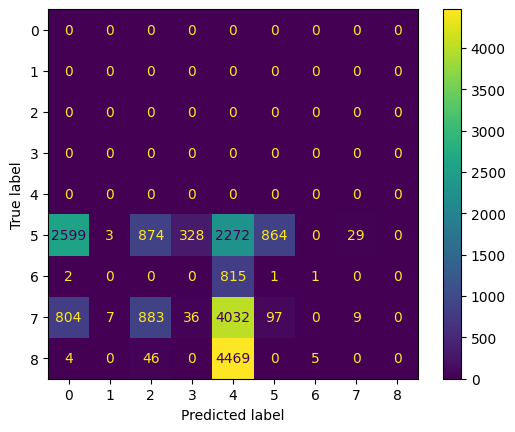

Accuracy ResNet-50 model:  0.04807480748074808


In [25]:

# Ensure y_test is a multiclass vector
if len(y_labels_l2_resampled_test.shape) > 1 and y_labels_l2_resampled_test.shape[1] > 1:
    y_labels_l2_resampled_test = np.argmax(y_labels_l2_resampled_test, axis=1)

# Predict and convert predictions to multiclass vector
y_pred_rn_p = model_rn.predict(X_test)
y_pred_rn = np.argmax(y_pred_rn_p, axis=1)

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_labels_l2_resampled_test, y_pred_rn)
plt.show()

# Calculate and print accuracy
acc_rn = accuracy_score(y_labels_l2_resampled_test, y_pred_rn)
print("Accuracy ResNet-50 model: ", acc_rn)